### Problem Statement : Compare how various incentives provided to employees will impact basic salary

In [1]:
#Importing pandas to analayze excel file
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
pd.__version__

'1.2.4'

In [2]:
# Assigning excel file to a dataframe
df = pd.read_csv('Employee_Salary_Compensation.csv')
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 678524
Number of Columns: 22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678524 entries, 0 to 678523
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  678524 non-null  int64  
 1   Job Family Code          678524 non-null  object 
 2   Job Code                 678524 non-null  object 
 3   Year Type                678524 non-null  object 
 4   Year                     678524 non-null  int64  
 5   Organization Group       678524 non-null  object 
 6   Department Code          678522 non-null  object 
 7   Department               678522 non-null  object 
 8   Union Code               678345 non-null  float64
 9   Union                    678345 non-null  object 
 10  Job Family               678524 non-null  object 
 11  Job                      678519 non-null  object 
 12  Employee Identifier      678524 non-null  int64  
 13  Salaries                 678524 non-null  float64
 14  Over

#### Missing Data Correction

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Checking for nulls
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 179
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

#### Correcting null values for Department and Deparment code

In [5]:
df[df['Department'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
548799,7,8300,8300,Fiscal,2017,General City Responsibilities,NaN,NaN,790.0,"SEIU, Local 1021, Misc",Correction & Detention,Sheriff's Cadet,37042591,49630.50,15016.51,4575.73,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24
548800,7,Q000,Q003,Fiscal,2017,General City Responsibilities,NaN,NaN,911.0,POA,Police Services,Police Officer 2,37069439,116189.62,40990.09,2260.08,159439.79,20076.66,14515.01,2724.05,37315.72,196755.51


In [6]:
df[df['Department Code'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
548799,7,8300,8300,Fiscal,2017,General City Responsibilities,NaN,NaN,790.0,"SEIU, Local 1021, Misc",Correction & Detention,Sheriff's Cadet,37042591,49630.50,15016.51,4575.73,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24
548800,7,Q000,Q003,Fiscal,2017,General City Responsibilities,NaN,NaN,911.0,POA,Police Services,Police Officer 2,37069439,116189.62,40990.09,2260.08,159439.79,20076.66,14515.01,2724.05,37315.72,196755.51


Both the records are same so we cannot infer department code from department or vice versa. Hence dropping those two columns

In [7]:
df = df.dropna(axis=0, subset=['Department Code','Department'])
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 678522
Number of Columns: 22


#### Next we try to correct job from job code

In [8]:
mapping = dict(df.dropna()[['Job Code', 'Job']].values)
df['Job'] = df['Job'].fillna(df['Job Code'].map(mapping))
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              0
Department                   0
Union Code                 179
Union                      179
Job Family                   0
Job                          0
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [9]:
df[df['Union'].isna()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
144675,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,10940,25998.00,1732.82,1454.07,29184.89,5008.11,3599.89,2287.72,10895.72,40080.61
144676,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,12058,76952.70,11617.41,6410.37,94980.48,15046.48,10799.68,7618.56,33464.72,128445.20
144677,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,16049,37882.80,1351.08,3552.62,42786.50,7324.09,5245.56,3386.34,15955.99,58742.49
144678,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,16413,39929.70,9355.48,4295.87,53581.05,7977.73,5656.98,4358.97,17993.68,71574.73
144679,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,1680,32969.70,2844.76,2010.33,37824.79,6341.53,4628.44,3098.15,14068.12,51892.91
144680,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,18601,7194.01,0.00,562.04,7756.05,1443.40,1028.54,638.13,3110.07,10866.12
144681,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,2005,17626.21,834.82,1349.21,19810.24,3536.07,2520.06,1561.30,7617.43,27427.67
144682,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,20191,63627.20,8156.76,7554.91,79338.87,12544.21,10851.11,6071.50,29466.82,108805.69
144683,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,22792,18941.40,1129.46,1142.09,21212.95,3664.40,2622.78,1683.97,7971.15,29184.10
144684,2,9100,9152,Calendar,2016,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,Street Transit,Transportation Controller Trainee,24302,27504.00,4787.81,4237.50,36529.31,5478.12,4628.44,2894.66,13001.22,49530.53


#### We will not be doing anything based on Union or union code. So we drop those two columns

In [10]:
df_new = df.drop(columns=['Union Code', 'Union','Job Family Code','Job Code','Year Type','Organization Group',
                         'Job Family','Job'])
df_new.shape

(678522, 14)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678522 entries, 0 to 678523
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  678522 non-null  int64  
 1   Year                     678522 non-null  int64  
 2   Department Code          678522 non-null  object 
 3   Department               678522 non-null  object 
 4   Employee Identifier      678522 non-null  int64  
 5   Salaries                 678522 non-null  float64
 6   Overtime                 678522 non-null  float64
 7   Other Salaries           678522 non-null  float64
 8   Total Salary             678522 non-null  float64
 9   Retirement               678522 non-null  float64
 10  Health and Dental        678522 non-null  float64
 11  Other Benefits           678522 non-null  float64
 12  Total Benefits           678522 non-null  float64
 13  Total Compensation       678522 non-null  float64
dtypes: f

In [12]:
df_new.head()

,Organization Group Code,Year,Department Code,Department,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,ADP,ADP Adult Probation,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,ADP,ADP Adult Probation,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,ADP,ADP Adult Probation,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,ADP,ADP Adult Probation,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,ADP,ADP Adult Probation,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [13]:
df_new['Department Code'] = df_new['Department Code'].astype('category').cat.codes
df_new.head()

,Organization Group Code,Year,Department Code,Department,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,2,ADP Adult Probation,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,2,ADP Adult Probation,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,2,ADP Adult Probation,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,2,ADP Adult Probation,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,2,ADP Adult Probation,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [14]:
df_new.describe()

,Organization Group Code,Year,Department Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,678522.000000,678522.000000,678522.000000,6.785220e+05,678522.000000,678522.000000,678522.000000,678522.000000,678522.000000,678522.000000,678522.000000,678522.000000,678522.000000
mean,2.978147,2016.541191,31.466853,1.982329e+07,70626.524598,5592.606780,3869.977713,79868.245508,14075.090902,10118.285473,5097.537893,29290.914268,109159.159775
std,1.579853,2.268687,14.184632,1.970531e+07,48191.010413,13324.735307,8631.426375,56230.798685,10392.893181,5850.558838,3748.288126,18202.247377,73062.811455
min,1.000000,2013.000000,0.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,23.000000,2.875200e+04,30502.027500,0.000000,0.000000,33435.402500,5059.495000,4934.695000,1937.502500,12486.975000,46833.965000
50%,2.000000,2017.000000,31.000000,3.665566e+07,68942.825000,0.000000,720.000000,76099.415000,14248.725000,12512.550000,4965.915000,33102.795000,109394.735000
75%,4.000000,2019.000000,44.000000,3.767592e+07,101887.430000,4429.410000,4399.640000,114258.990000,20619.307500,14391.597500,7620.730000,41566.507500,156607.240000
max,7.000000,2020.000000,59.000000,4.609664e+07,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


<AxesSubplot:>

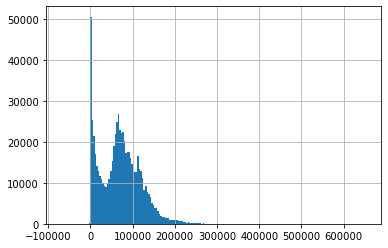

In [15]:
df_new.Salaries.hist(bins=200)

As we are basing our analysis primarly on the salaries we do not want such a distribution. So, we try to figure out the base salary remove records under the minimum wage we consider an average of 14 $ and calculate salary and remove all the records below that. 
https://sfgov.org/olse/historical-wage-rates-definition-government-supported-employee/

Calculation : Considering number of working days as 280 in an year, when we calculate we get base salary of around 30000 $ year

<AxesSubplot:>

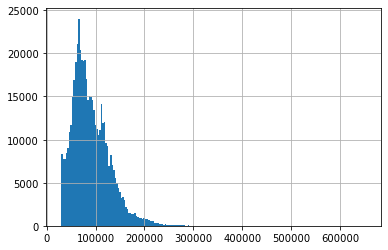

In [16]:
df_new = df_new.query('Salaries > 30000')
df_new.Salaries.hist(bins=200)

#### Benefits cannot be negative so we are deleting records whose numerical values are less than zero.

In [17]:
# Get names of indexes for which column Age has value 30
indexNames = df_new[ (df_new['Retirement'] <= 0.0) | (df_new['Health and Dental'] <= 0.0) | (df_new['Other Benefits'] <= 0.0)].index
df_cleared = df_new.drop(indexNames)
df_cleared.head()

,Organization Group Code,Year,Department Code,Department,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,2,ADP Adult Probation,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,2,ADP Adult Probation,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,2,ADP Adult Probation,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,2,ADP Adult Probation,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
5,1,2013,2,ADP Adult Probation,36223,34456.00,0.0,0.00,34456.00,7346.00,3827.63,2579.95,13753.58,48209.58


In [18]:
df_cleared.describe()

,Organization Group Code,Year,Department Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,490653.000000,490653.000000,490653.000000,4.906530e+05,490653.000000,490653.000000,490653.000000,490653.000000,490653.000000,490653.000000,490653.000000,490653.000000,490653.000000
mean,2.782775,2016.618021,31.270425,2.056099e+07,91426.148224,7514.320784,4695.041725,103447.450591,18790.037700,13268.488063,6534.150396,38592.676159,142040.126749
std,1.561921,2.276966,14.325682,1.972709e+07,38157.117736,15145.061203,8851.381001,46023.580450,8020.663657,2973.357343,3274.894469,11524.083274,56071.900847
min,1.000000,2013.000000,0.000000,1.000000e+00,30000.830000,-12308.660000,-19131.100000,30000.830000,0.010000,12.860000,0.010000,2842.000000,34888.190000
25%,2.000000,2015.000000,23.000000,2.983200e+04,63978.000000,0.000000,0.000000,69549.310000,13239.320000,12424.500000,4252.080000,31564.670000,101364.610000
50%,2.000000,2017.000000,31.000000,3.669630e+07,83894.500000,425.940000,1500.000000,93445.960000,17308.220000,13298.210000,6236.970000,37628.280000,131537.080000
75%,4.000000,2019.000000,41.000000,3.805597e+07,113766.990000,8367.650000,5987.320000,129818.710000,22971.910000,15026.780000,8580.250000,44625.450000,175253.890000
max,7.000000,2020.000000,59.000000,4.609662e+07,651936.710000,321523.310000,568163.120000,658867.570000,128694.620000,59405.230000,35691.040000,166068.180000,807625.250000


#### Correlation heat map 

<AxesSubplot:>

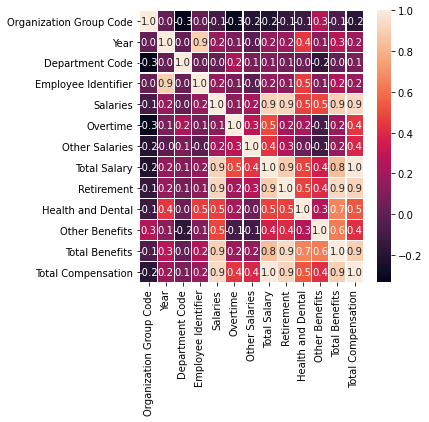

In [19]:
#Corelation heat map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_cleared.corr(), annot=True, linewidths=0.1, fmt= '.1f',ax=ax)

array([[<AxesSubplot:xlabel='Salaries', ylabel='Salaries'>,
        <AxesSubplot:xlabel='Total Salary', ylabel='Salaries'>,
        <AxesSubplot:xlabel='Total Compensation', ylabel='Salaries'>,
        <AxesSubplot:xlabel='Health and Dental', ylabel='Salaries'>,
        <AxesSubplot:xlabel='Retirement', ylabel='Salaries'>],
       [<AxesSubplot:xlabel='Salaries', ylabel='Total Salary'>,
        <AxesSubplot:xlabel='Total Salary', ylabel='Total Salary'>,
        <AxesSubplot:xlabel='Total Compensation', ylabel='Total Salary'>,
        <AxesSubplot:xlabel='Health and Dental', ylabel='Total Salary'>,
        <AxesSubplot:xlabel='Retirement', ylabel='Total Salary'>],
       [<AxesSubplot:xlabel='Salaries', ylabel='Total Compensation'>,
        <AxesSubplot:xlabel='Total Salary', ylabel='Total Compensation'>,
        <AxesSubplot:xlabel='Total Compensation', ylabel='Total Compensation'>,
        <AxesSubplot:xlabel='Health and Dental', ylabel='Total Compensation'>,
        <AxesSubplot:xlab

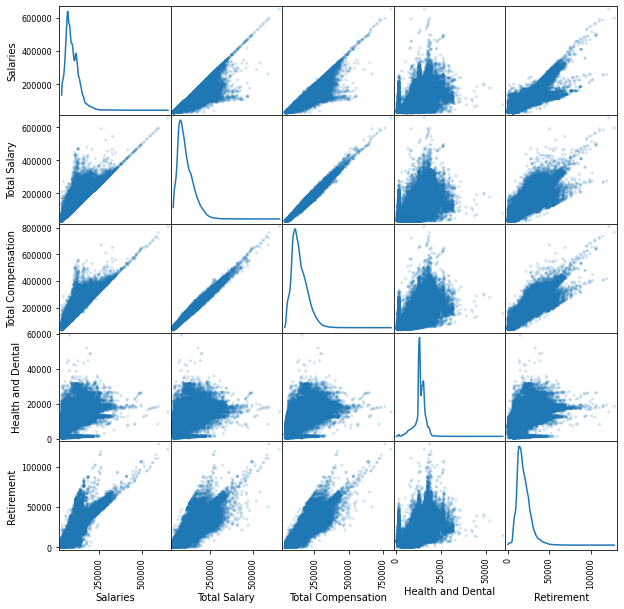

In [20]:
scatter_matrix(df_cleared[['Salaries','Total Salary', 'Total Compensation','Health and Dental','Retirement']], alpha=0.2, figsize=(10,10), diagonal='kde')

#### Stats Model

In [26]:
df2 = df_cleared.drop(columns=['Organization Group Code','Department','Year','Employee Identifier'])
# df2['const'] = 1
feature_list = list(df2)
df2.head()

,Department Code,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,2,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,2,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,2,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,2,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
5,2,34456.00,0.0,0.00,34456.00,7346.00,3827.63,2579.95,13753.58,48209.58


In [27]:
df2['Department Code'] = df2['Department Code'].astype(float)
print(df2.dtypes)

Department Code       float64
Salaries              float64
Overtime              float64
Other Salaries        float64
Total Salary          float64
Retirement            float64
Health and Dental     float64
Other Benefits        float64
Total Benefits        float64
Total Compensation    float64
dtype: object


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490653 entries, 0 to 678523
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Department Code     490653 non-null  float64
 1   Salaries            490653 non-null  float64
 2   Overtime            490653 non-null  float64
 3   Other Salaries      490653 non-null  float64
 4   Total Salary        490653 non-null  float64
 5   Retirement          490653 non-null  float64
 6   Health and Dental   490653 non-null  float64
 7   Other Benefits      490653 non-null  float64
 8   Total Benefits      490653 non-null  float64
 9   Total Compensation  490653 non-null  float64
dtypes: float64(10)
memory usage: 57.3 MB


In [29]:
import statsmodels.api as smf
#log transformed the target variable to reduce variance
# logSalaries = np.log(df2['Salaries'])
df2['const'] = 1
featureNames = [x for x in df2.columns if x != 'Salaries']
statsModelsCoefs = smf.OLS(df2['Salaries'], df2[featureNames]).fit()
print(statsModelsCoefs.summary())

                            OLS Regression Results                            
Dep. Variable:               Salaries   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.980e+07
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:21:04   Log-Likelihood:            -4.3869e+06
No. Observations:              490653   AIC:                         8.774e+06
Df Residuals:                  490645   BIC:                         8.774e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Department Code        1.5765      0

Results:
1. Seems like the all the values are linear with overall r^2 value of 99 percent 0.99 and is a good fit model.
2. We can conclude that there is almost a good linear relationship between features from r^2 value.

#### OLS

Estimation of how various benefits effect the salary of the employees in san Francisco

We are dividing the dataset into test and train sets. The test size = 20 percent of whole data

In [30]:
#Splitting of data into test and training data
from sklearn.model_selection import train_test_split

y = df2['Health and Dental'] + df2['Retirement'] + df2['Other Benefits']
X_train, X_test, y_train, y_test = train_test_split(df2['Salaries'],y , test_size=0.20)
print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 392,522
Test samples: 98,131


In [31]:
print(X_train.shape,
      y_train.shape)

(392522,) (392522,)


Convert pandas object to numpy arrays

In [32]:
X_training = np.asanyarray(X_train).reshape(-1,1)
y_training = np.asanyarray(y_train).reshape(-1,1)
print(X_training.shape,
      y_training.shape)

(392522, 1) (392522, 1)


#### Training data

In [33]:
# initializing model
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fitting data
model.fit(X_training,y_training)

# Predict 
pred_lineartrain = model.predict(X_training)

# R Square
linear_train_rsquare = r2_score(y_training,pred_lineartrain)

print('Training R square score:',linear_train_rsquare)


Training R square score: 0.8167581785723527


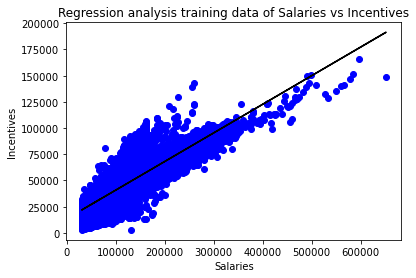

In [35]:
plt.scatter(X_training,y_training, color="blue");
plt.plot(X_training, pred_lineartrain, color="black");
plt.xlabel("Salaries");
plt.ylabel("Incentives");
plt.title("Regression analysis training data of Salaries vs Incentives");

#### Test data

In [36]:
X_testing = np.asanyarray(X_test).reshape(-1,1)
y_testing = np.asanyarray(y_test).reshape(-1,1)
print(X_testing.shape,
      y_testing.shape)

(98131, 1) (98131, 1)


In [37]:
pred_lineartest = model.predict(X_testing)
linear_test_rsquare = r2_score(y_testing,pred_lineartest)
print('Test R square score:',linear_test_rsquare)

Test R square score: 0.8176868262864386


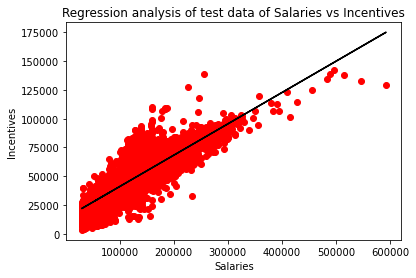

In [38]:
plt.scatter(X_testing,y_testing, color="red");
plt.plot(X_testing, pred_lineartest, color="black");
plt.xlabel("Salaries");
plt.ylabel("Incentives");
plt.title("Regression analysis of test data of Salaries vs Incentives");

#### The r square value for the predicted model is working almost similarly for both test and training data.
1. Test data r square value is 0.816
2. For Training data r square value is 0.817
3. There is no much difference between test and train r square values which signifies our model is good.

#### Ridge regression

In [40]:
from sklearn.linear_model import Ridge
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1,5,10]
for a in alphas:
     model = Ridge(alpha=a, normalize=True).fit(X_training,y_training)
     score= model.score(X_training, y_training)
     pred_y = model.predict(X_training)
     mse = mean_squared_error(y_training, pred_y) 
     print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
        .format(a, score, mse, np.sqrt(mse)))


Alpha:0.000001, R2:0.817, MSE:24287906.44, RMSE:4928.28
Alpha:0.000010, R2:0.817, MSE:24287906.45, RMSE:4928.28
Alpha:0.000100, R2:0.817, MSE:24287907.52, RMSE:4928.28
Alpha:0.001000, R2:0.817, MSE:24288014.48, RMSE:4928.29
Alpha:0.010000, R2:0.817, MSE:24298518.90, RMSE:4929.35
Alpha:0.100000, R2:0.810, MSE:25182598.54, RMSE:5018.23
Alpha:0.500000, R2:0.726, MSE:36316544.67, RMSE:6026.32
Alpha:1.000000, R2:0.613, MSE:51352342.47, RMSE:7166.05
Alpha:5.000000, R2:0.250, MSE:99466895.43, RMSE:9973.31
Alpha:10.000000, R2:0.142, MSE:113757116.48, RMSE:10665.70


#### The best alpha value we can take to predit using ridge regression is < 0.01 for a perfect fit model. So we use alpha value = 0.01

#### Training data

In [41]:
ridge_reg = Ridge(alpha=0.01, normalize = True)
ridge_reg.fit(X_training, y_training) 
pred_train_rr= ridge_reg.predict(X_training)
print('RMSE value',np.sqrt(mean_squared_error(y_training,pred_train_rr)))
print('R square value for training data :',r2_score(y_train, pred_train_rr))

RMSE value 4929.352787040194
R square value for training data : 0.8166781120907751


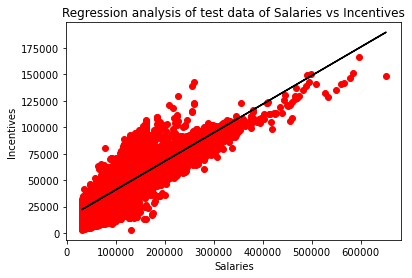

In [42]:
plt.scatter(X_training,y_training, color="red", label='Original');
plt.plot(X_training, pred_train_rr, color="black", label = 'Predicted');
plt.xlabel("Salaries");
plt.ylabel("Incentives");
plt.title("Regression analysis of test data of Salaries vs Incentives");

In [43]:
pred_test_rr= ridge_reg.predict(X_testing)
print('RMSE value:',np.sqrt(mean_squared_error(y_testing,pred_test_rr)))
print('R square value for test data:',r2_score(y_testing, pred_test_rr))

RMSE value: 4941.823173294654
R square value for test data: 0.8175279899578686


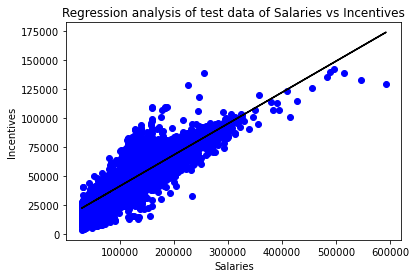

In [44]:
plt.scatter(X_testing,y_testing, color="blue", label='Original');
plt.plot(X_testing, pred_test_rr, color="black", label = 'Predicted');
plt.xlabel("Salaries");
plt.ylabel("Incentives");
plt.title("Regression analysis of test data of Salaries vs Incentives");

#### Conclusion
1. When we run Stats model we get a very high R square value which is around 99 percent which depicts high variance. The t values also depicts high interdependencies.
2. The the data is mostly linear, When we analysed the Rsquare values for ridge and sklearn came to be similar
3. The alpha values for Ridge regression only changes from 0.1 and above and the r square value decreases from this point which deteriorates the model prediction.